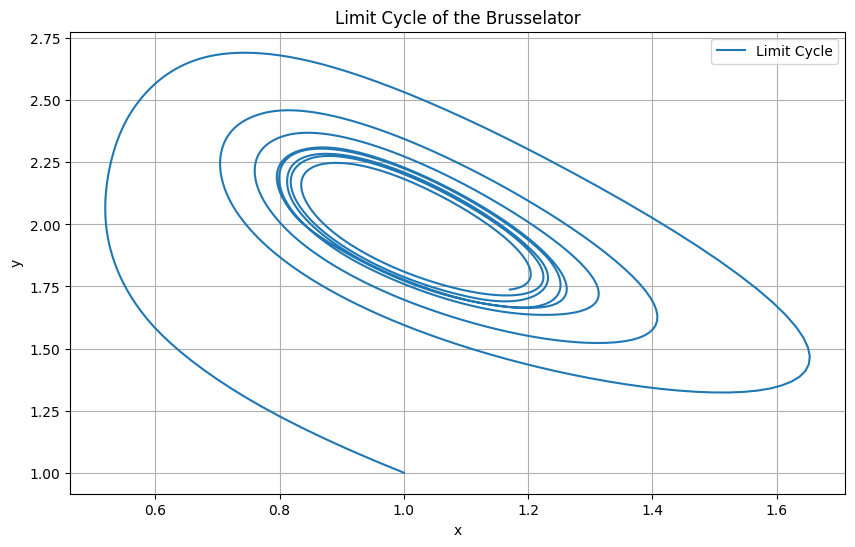

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for the Brusselator
A = 1.0
B = 2.0

# Define the system of ODEs
def brusselator(t, y):
    x, y = y
    dxdt = A + x**2 * y - (B + 1) * x
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

# Initial conditions
y0 = [1.0, 1.0]

# Time span for the simulation
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve the ODE
solution = solve_ivp(brusselator, t_span, y0, t_eval=t_eval)

# Plotting the limit cycle
plt.figure(figsize=(10, 6))
plt.plot(solution.y[0], solution.y[1], label='Limit Cycle')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Limit Cycle of the Brusselator')
plt.legend()
plt.grid(True)
plt.show()


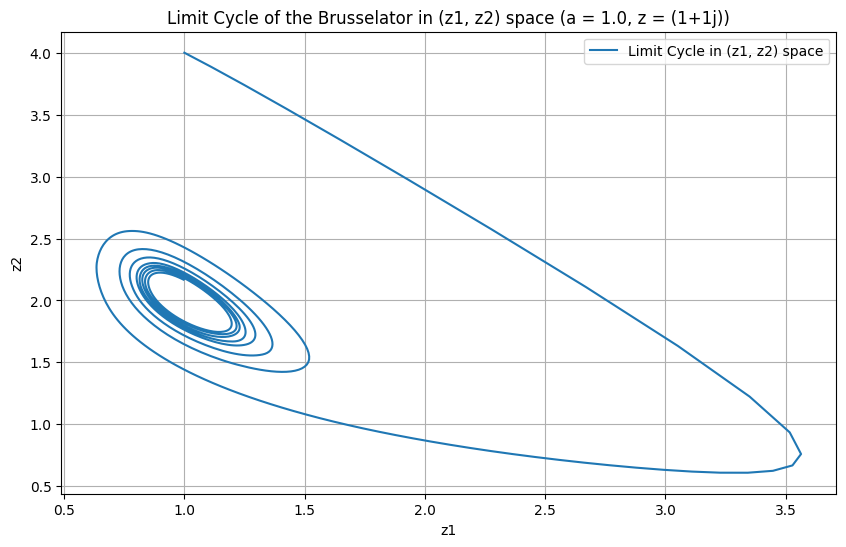

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for the Brusselator
A = 1.0
B = 2.0

# Define the system of ODEs for the Brusselator
def brusselator(t, y):
    x, y = y
    dxdt = A + x**2 * y - (B + 1) * x
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

# Define a
a = 1.0

# Initial conditions for the modified system
x0 = np.array([a, (1 + a**2) / a], dtype=complex)

# Define q and its complex conjugate
q = np.array([-(1j * a + a**2) / (1 + a**2), 1], dtype=complex)
q_conj = np.conj(q)

# Define z as a complex number and z_conj as its complex conjugate
z = 1 + 1j  # Example value, can be modified
z_conj = np.conj(z)

# Initial condition incorporating q and its conjugate
y0_complex = x0 + z * q + z_conj * q_conj
y0 = [y0_complex[0].real, y0_complex[1].real]  # Initial condition for real-valued solver

# Time span for the simulation
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve the ODE
solution = solve_ivp(brusselator, t_span, y0, t_eval=t_eval)

# Transform the solution to (z1, z2) space
z_vals = np.array([solution.y[0] + 1j * solution.y[1]])
z1_vals = np.real(z_vals)
z2_vals = np.imag(z_vals)

# Plotting the limit cycle in (z1, z2) space
plt.figure(figsize=(10, 6))
plt.plot(z1_vals[0], z2_vals[0], label='Limit Cycle in (z1, z2) space')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title(f'Limit Cycle of the Brusselator in (z1, z2) space (a = {a}, z = {z})')
plt.legend()
plt.grid(True)
plt.show()
